<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.2: Working with Text
- Using [NLTK](http://www.nltk.org) (Natural Language Toolkit)
- Using [spaCy](https://spacy.io)

INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

## Import libraries

In [1]:
!pip install spacy

In [2]:
## Import Libraries
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

import regex as re
import spacy
#import nltk

In [3]:
import numpy
numpy.version.version

'2.0.2'

## Load data

In [5]:
from google.colab import files
uploaded = files.upload()


Saving ncc-1701-D.txt to ncc-1701-D.txt


In [7]:
## Loading the data


with open('ncc-1701-D.txt', 'r') as f:
    text = f.read()

## Inspect the data

In [8]:
print(text[:1000])

USS Enterprise (NCC-1701-D)

"For five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different."

The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.

==History==
===Construction and launch===
The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus.

One of the ship's nacelle tube was

## Work the data
- if necessary or desired
    - remove text or content, e.g. quotes (") or metadata (===)
    - add content or markers, e.g. (#FLAG, --NAME--)
    - remove or convert special symbols, e.g. "é" to "e"
    - remove or convert emoticons

In [11]:
!pip install emoji
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 7.5 MB/s eta 0:00:00


In [12]:
# ANSWER
import re
import emoji
from unidecode import unidecode

def preprocess_text(text):
    # Step 1: REMOVE QUOTES & METADATA
    text = re.sub(r'["“”]', '', text)                     # Remove double quotes
    text = re.sub(r'={2,}.*?={2,}', '', text)             # Remove metadata between ===...===

    # Step 2: ADD MARKERS
    text = re.sub(r'\b[A-Z]{2,}\b', r'#FLAG \g<0>', text) # Tag ALLCAPS words
    text = re.sub(r'\b(John|Maria|Alice)\b', r'--NAME--\1--NAME--', text)  # Tag example names

    # Step 3: CONVERT SPECIAL CHARACTERS
    text = unidecode(text)                                # Normalize accents (é → e, ñ → n)

    # Step 4: REMOVE/REPLACE EMOJIS
    text = emoji.replace_emoji(text, replace='')          # Remove emojis

    # Step 5: REMOVE ASCII EMOTICONS
    emoticon_pattern = r'[:;=8][\-o\*\']?[\)\]\(\[dDpP/\:\}\{@\|\\]'
    text = re.sub(emoticon_pattern, '', text)

    # Optional: remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

print(text[:2000])

USS Enterprise (NCC-1701-D)

"For five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different."

The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.

==History==
===Construction and launch===
The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus.

One of the ship's nacelle tube was

## Helper method

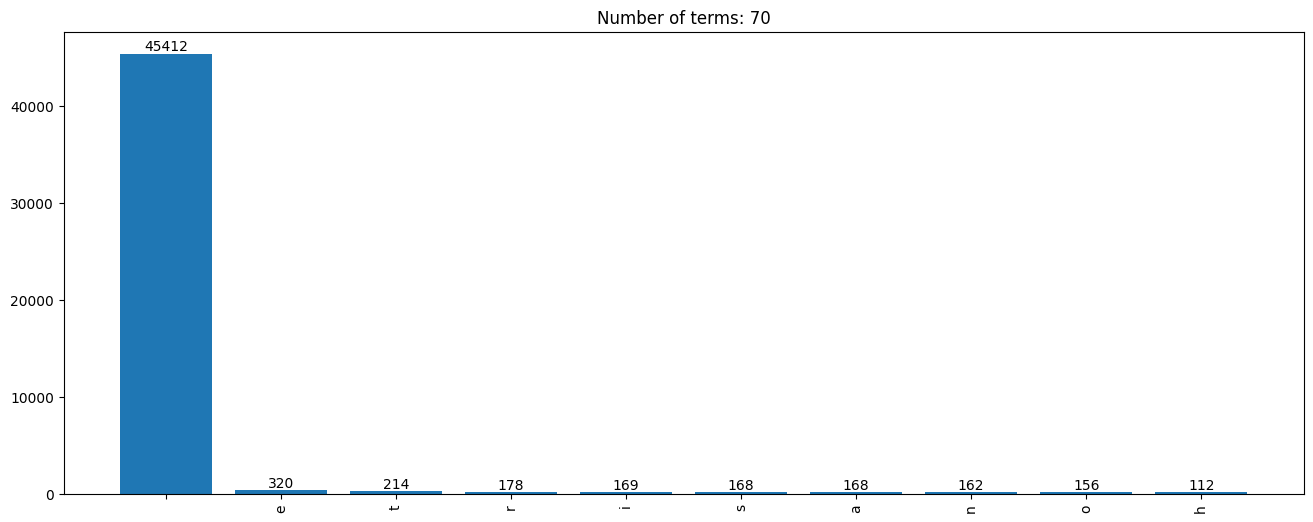

In [33]:
# create a bar chart of the frequency of the words in the text
def plot_words(tokens, top = 5):
    tokens_counter = Counter(tokens)
    tok = [t for (t, _) in tokens_counter.most_common()]
    val = [v for (_, v) in tokens_counter.most_common()]

    plt.figure(figsize = (16, 6))
    plt.bar(tok[:top], val[:top])
    plt.title('Number of terms: %d' % len(tokens_counter))
    plt.xticks(rotation = 90)

    for i, label in enumerate(val[:top]):
        plt.text(i, label, label, ha='center', va='bottom')

    plt.show()

plot_words(text, top=10)

## spaCy model invocation and text processing
spaCy does the processing of the text as part of the reading of the data.

In [15]:
!pip install -U spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 67.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [16]:
# load spaCy and the English model
!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

# process the text
doc = nlp(text)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 41.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Tokenise

In [18]:
# only show the results
# spaCy has done it already
for i, t in enumerate(doc):
    print('%2d| %r' % (i+1, t.text))
    if t.text == '.':
        break

 1| 'USS'
 2| 'Enterprise'
 3| '('
 4| 'NCC-1701'
 5| '-'
 6| 'D'
 7| ')'
 8| '\n\n'
 9| '"'
10| 'For'
11| 'five'
12| 'hundred'
13| 'years'
14| ','
15| 'every'
16| 'ship'
17| 'that'
18| 'has'
19| 'borne'
20| 'the'
21| 'name'
22| 'of'
23| 'the'
24| 'Enterprise'
25| 'has'
26| 'become'
27| 'a'
28| 'legend'
29| '.'


### Stop Words

In [21]:
## spaCy
print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
for i, t in enumerate(doc):
    print('%2d| %-15r %r' % (i+1, t.text, ('' if t.is_stop else t.text)))

    # break after the first sentence
    if t.text == '.':
        break

i | with stop words without
--| --------------- ------------
 1| 'USS'           'USS'
 2| 'Enterprise'    'Enterprise'
 3| '('             '('
 4| 'NCC-1701'      'NCC-1701'
 5| '-'             '-'
 6| 'D'             'D'
 7| ')'             ')'
 8| '\n\n'          '\n\n'
 9| '"'             '"'
10| 'For'           ''
11| 'five'          ''
12| 'hundred'       ''
13| 'years'         'years'
14| ','             ','
15| 'every'         ''
16| 'ship'          'ship'
17| 'that'          ''
18| 'has'           ''
19| 'borne'         'borne'
20| 'the'           ''
21| 'name'          ''
22| 'of'            ''
23| 'the'           ''
24| 'Enterprise'    'Enterprise'
25| 'has'           ''
26| 'become'        ''
27| 'a'             ''
28| 'legend'        'legend'
29| '.'             '.'


In [23]:
print(type(text))  # <class 'str'> expected


<class 'str'>


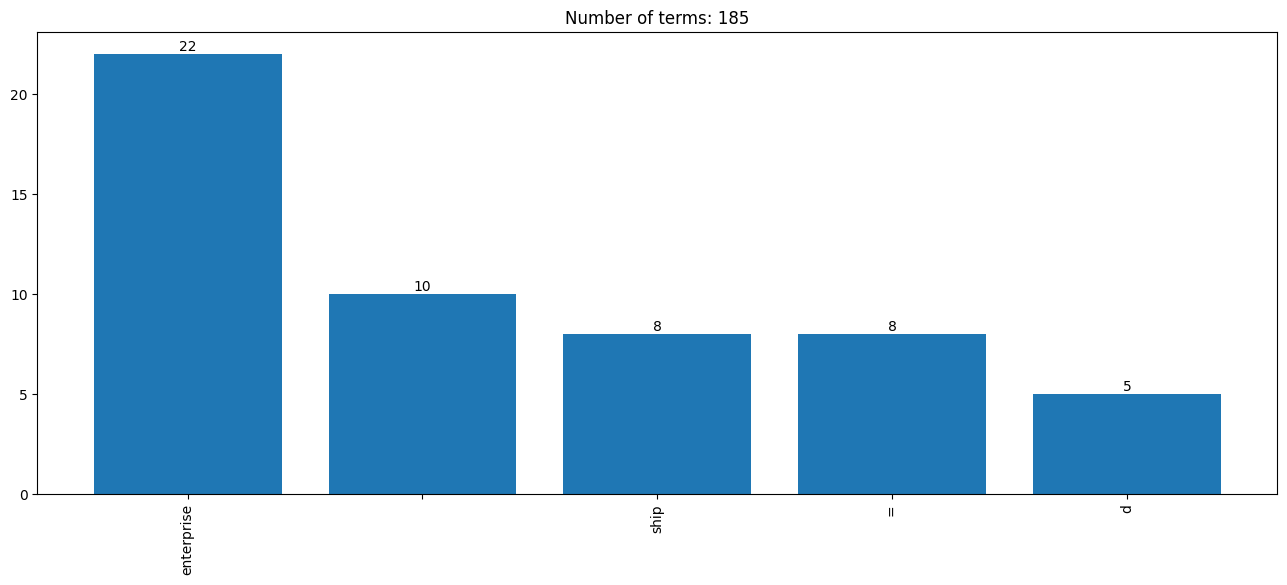

In [34]:
plot_words([t.text.lower() for t in doc if not (t.is_stop or t.is_punct)])


### Check Part of Speech

In [35]:
## spaCy
for i, t in enumerate(doc):
    print('%2d|%-12r : %-5s %s' % (i+1, t.text, t.pos_, t.tag_))
    if t.text == '.':
        break

 1|'USS'        : PROPN NNP
 2|'Enterprise' : PROPN NNP
 3|'('          : PUNCT -LRB-
 4|'NCC-1701'   : PROPN NNP
 5|'-'          : PUNCT HYPH
 6|'D'          : NOUN  NN
 7|')'          : PUNCT -RRB-
 8|'\n\n'       : SPACE _SP
 9|'"'          : PUNCT ``
10|'For'        : ADP   IN
11|'five'       : NUM   CD
12|'hundred'    : NUM   CD
13|'years'      : NOUN  NNS
14|','          : PUNCT ,
15|'every'      : DET   DT
16|'ship'       : NOUN  NN
17|'that'       : PRON  WDT
18|'has'        : AUX   VBZ
19|'borne'      : VERB  VBN
20|'the'        : DET   DT
21|'name'       : NOUN  NN
22|'of'         : ADP   IN
23|'the'        : DET   DT
24|'Enterprise' : NOUN  NN
25|'has'        : AUX   VBZ
26|'become'     : VERB  VBN
27|'a'          : DET   DT
28|'legend'     : NOUN  NN
29|'.'          : PUNCT .


### Lemmatisation

In [36]:
## spaCy
print('i | Token        Lemma')
print('--| ------------ ------------')
for i, t in enumerate(doc):
    print('%2d| %-12r %r' % (i+1, t.text, t.lemma_))
    if t.text == '.':
        break

i | Token        Lemma
--| ------------ ------------
 1| 'USS'        'USS'
 2| 'Enterprise' 'Enterprise'
 3| '('          '('
 4| 'NCC-1701'   'NCC-1701'
 5| '-'          '-'
 6| 'D'          'd'
 7| ')'          ')'
 8| '\n\n'       '\n\n'
 9| '"'          '"'
10| 'For'        'for'
11| 'five'       'five'
12| 'hundred'    'hundred'
13| 'years'      'year'
14| ','          ','
15| 'every'      'every'
16| 'ship'       'ship'
17| 'that'       'that'
18| 'has'        'have'
19| 'borne'      'bear'
20| 'the'        'the'
21| 'name'       'name'
22| 'of'         'of'
23| 'the'        'the'
24| 'Enterprise' 'enterprise'
25| 'has'        'have'
26| 'become'     'become'
27| 'a'          'a'
28| 'legend'     'legend'
29| '.'          '.'


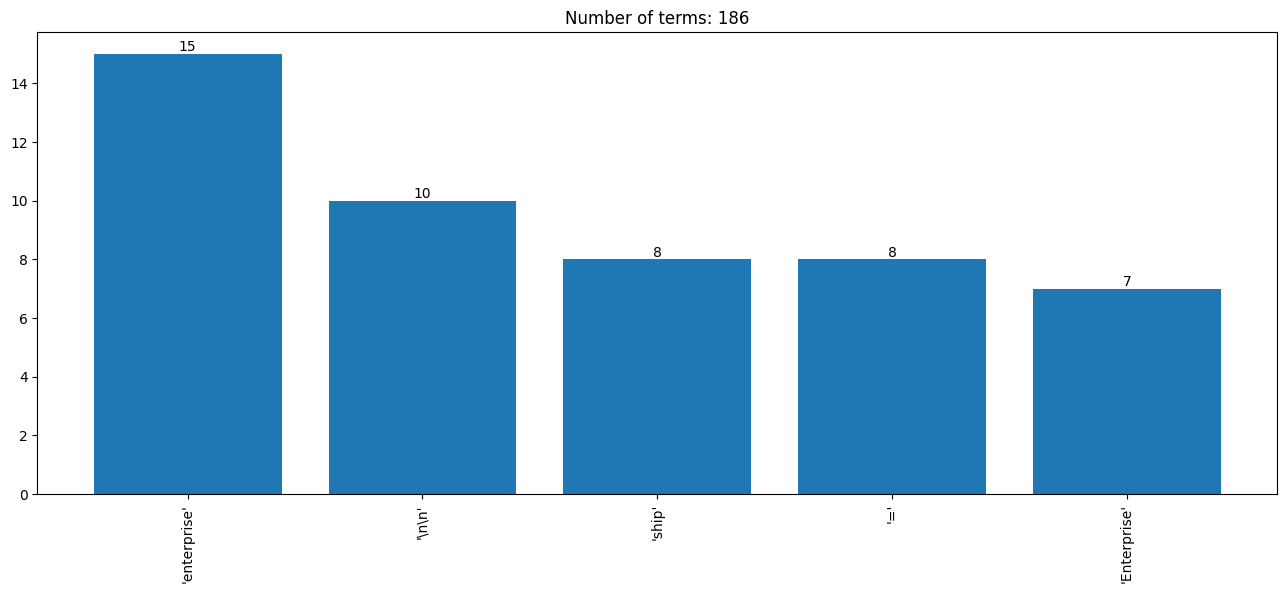

In [37]:
plot_words(['%r' % t.lemma_ for t in doc if not (t.is_stop | t.is_punct)])

### Entity Recognition

In [38]:
## spaCy
for i, s in enumerate(doc.sents):
    print('%2d: %s' % (i, re.sub(r'\n+', '', s.text)))
    if s.as_doc().ents:
        print('-'*80)
        for e in s.as_doc().ents:
            print('%-11s: %s' % (e.label_, re.sub(r'\n+', '', e.text)))
    print('='*80)

 0: USS Enterprise (NCC-1701-D)"For five hundred years, every ship that has borne the name of the Enterprise has become a legend.
--------------------------------------------------------------------------------
ORG        : USS Enterprise
DATE       : five hundred years
ORG        : Enterprise
 1: This one is no different.
 2: "The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise.
--------------------------------------------------------------------------------
ORG        : The USS Enterprise
DATE       : a 24th century
ORG        : United Federation of Planets Galaxy
ORDINAL    : fifth
 3: During her career, the Enterprise served as the Federation flagship.
--------------------------------------------------------------------------------
ORG        : Enterprise
ORG        : Federation
 4: The Enterprise was destroyed during the Battle of Veridian III in 2371.

## Extra: Using NLTK for NLP

### Tokenise

In [44]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [56]:
doc = nlp(text)

In [57]:
# use nltk to find tokens
tokens = nltk.word_tokenize(text)

for i, t in enumerate(tokens[:25]):
    print('%2d| %r' % (i+1, t))

 1| 'U'
 2| 'S'
 3| 'S'
 4| 'E'
 5| 'n'
 6| 't'
 7| 'e'
 8| 'r'
 9| 'p'
10| 'r'
11| 'i'
12| 's'
13| 'e'
14| '('
15| 'N'
16| 'C'
17| 'C'
18| '-'
19| '1'
20| '7'
21| '0'
22| '1'
23| '-'
24| 'D'
25| ')'


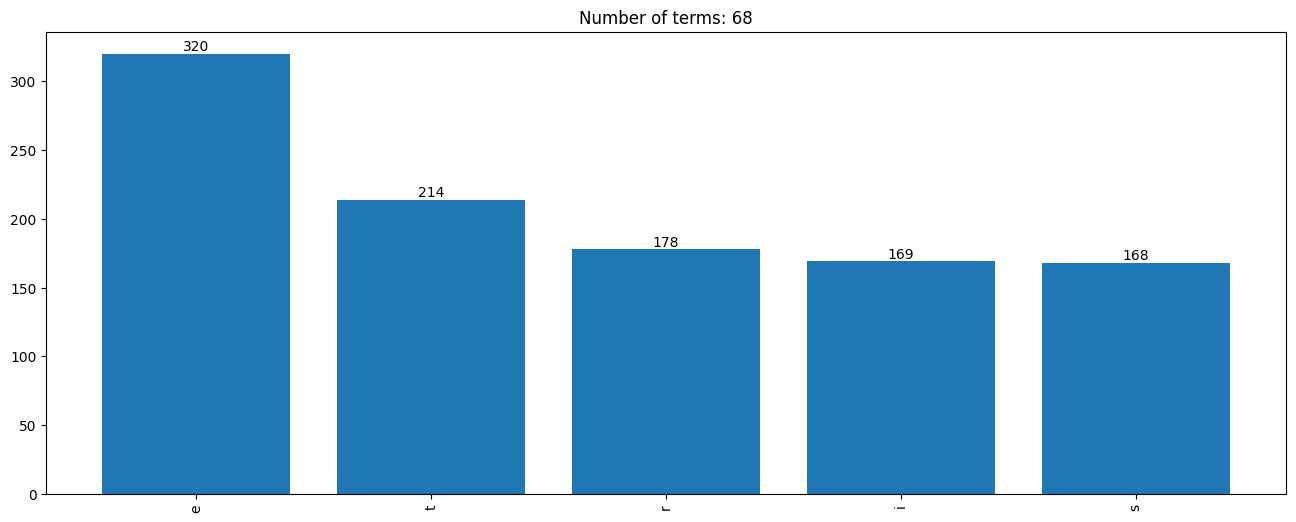

In [46]:
plot_words(tokens)

### Stop words

In [48]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [49]:
stopWords = nltk.corpus.stopwords.words('english')

stopWords.sort()
print(', '.join(stopWords))

a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, he'd, he'll, he's, her, here, hers, herself, him, himself, his, how, i, i'd, i'll, i'm, i've, if, in, into, is, isn, isn't, it, it'd, it'll, it's, its, itself, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she'd, she'll, she's, should, should've, shouldn, shouldn't, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, they'd, they'll, they're, they've, this, those, through, to, too, under, until, up, v

In [59]:
# ANSWER
# NOTE: see the `.lower()` method applied to token
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

# Tokenize the string
tokens = word_tokenize(text)

# Filter stopwords and punctuation
stop_words = set(stopwords.words('english'))
tokens_no_stop = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]

print(tokens_no_stop)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['u', 'e', 'n', 'e', 'r', 'p', 'r', 'e', 'n', 'c', 'c', 'f', 'r', 'f', 'v', 'e', 'h', 'u', 'n', 'r', 'e', 'e', 'r', 'e', 'v', 'e', 'r', 'h', 'p', 'h', 'h', 'b', 'r', 'n', 'e', 'h', 'e', 'n', 'e', 'f', 'h', 'e', 'e', 'n', 'e', 'r', 'p', 'r', 'e', 'h', 'b', 'e', 'c', 'e', 'l', 'e', 'g', 'e', 'n', 'h', 'n', 'e', 'n', 'f', 'f', 'e', 'r', 'e', 'n', 'h', 'e', 'u', 'e', 'n', 'e', 'r', 'p', 'r', 'e', 'n', 'c', 'c', 'w', 'h', 'c', 'e', 'n', 'u', 'r', 'u', 'n', 'e', 'f', 'e', 'e', 'r', 'n', 'f', 'p', 'l', 'n', 'e', 'g', 'l', 'x', 'c', 'l', 'r', 'h', 'p', 'p', 'e', 'r', 'e', 'b', 'r', 'f', 'l', 'e', 'e', 'n', 'h', 'e', 'f', 'f', 'h', 'f', 'e', 'e', 'r', 'n', 'h', 'p', 'b', 'e', 'r', 'h', 'e', 'n', 'e', 'e', 'n', 'e', 'r', 'p', 'r', 'e', 'u', 'r', 'n', 'g', 'h', 'e', 'r', 'c', 'r', 'e', 'e', 'r', 'h', 'e', 'e', 'n', 'e', 'r', 'p', 'r', 'e', 'e', 'r', 'v', 'e', 'h', 'e', 'f', 'e', 'e', 'r', 'n', 'f', 'l', 'g', 'h', 'p', 'h', 'e', 'e', 'n', 'e', 'r', 'p', 'r', 'e', 'w', 'e', 'r', 'e', 'u', 'r', 'n',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
# Make sure everything is clean
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Step 1: Your clean text string
text = "This is the captain of the USS Enterprise-D. Engage!"

# Step 2: Tokenize into words
tokens = word_tokenize(text)

# Step 3: Define stopwords and filter out punctuation & stopwords
stop_words = set(stopwords.words('english'))
tokens_no_stop = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]

# Step 4: Output the cleaned words
print("✅ Tokens with stopwords removed:")
print(tokens_no_stop)


✅ Tokens with stopwords removed:
['captain', 'uss', 'engage']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
print("type of text:", type(text))
print("type of tokens:", type(tokens))
print("first 10 tokens:", tokens[:10])


type of text: <class 'str'>
type of tokens: <class 'list'>
first 10 tokens: ['This', 'is', 'the', 'captain', 'of', 'the', 'USS', 'Enterprise-D', '.', 'Engage']


In [66]:
## NLTK
i = 0
j = 0

print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
while i < len(tokens):
    # same word
    if tokens[i] == tokens_no_stop[j]:
        print('%2d| %-15r %r' % (i+1, tokens[i], tokens_no_stop[j]))
        j += 1
    # not the same word
    else:
        print('%2d| %-15r' % (i+1, tokens[i]))

    # next word
    i += 1
    # break after the first sentence
    if tokens[i-1] == '.':
        break

i | with stop words without
--| --------------- ------------
 1| 'This'         
 2| 'is'           
 3| 'the'          
 4| 'captain'       'captain'
 5| 'of'           
 6| 'the'          
 7| 'USS'          
 8| 'Enterprise-D' 
 9| '.'            


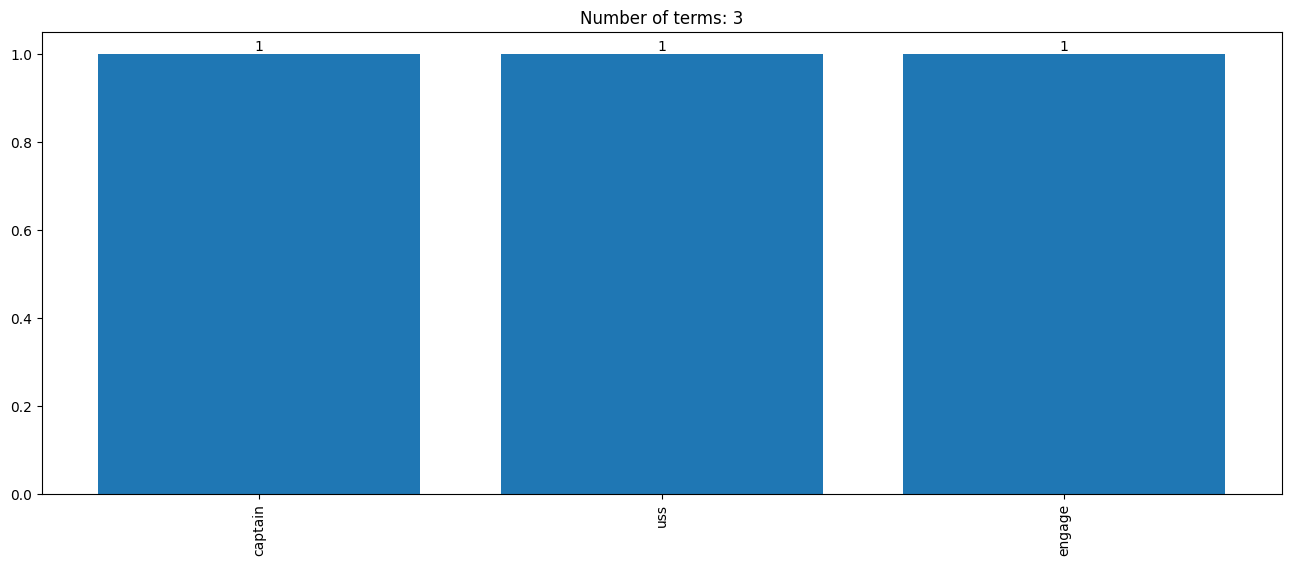

In [67]:
# Create plot of words without stopword
# ANSWER

plot_words(tokens_no_stop)

### Check Part of Speech

In [68]:
# define PoS
pos_list = {
    'CC':   'coordinating conjunction',
    'CD':   'cardinal digit',
    'DT':   'determiner',
    'EX':   'existential there (like: "there is" ... think of it like "there exists")',
    'FW':   'foreign word',
    'IN':   'preposition/subordinating conjunction',
    'JJ':   'adjective "big"',
    'JJR':  'adjective, comparative "bigger"',
    'JJS':  'adjective, superlative "biggest"',
    'LS':   'list marker 1)',
    'MD':   'modal could, will',
    'NN':   'noun, singular "desk"',
    'NNS':  'noun plural "desks"',
    'NNP':  'proper noun, singular "Harrison"',
    'NNPS': 'proper noun, plural "Americans"',
    'PDT':  'predeterminer "all the kids"',
    'POS':  'possessive ending parent"s',
    'PRP':  'personal pronoun I, he, she',
    'PRP$': 'possessive pronoun my, his, hers',
    'RB':   'adverb very, silently,',
    'RBR':  'adverb, comparative better',
    'RBS':  'adverb, superlative best',
    'RP':   'particle give up',
    'TO':   'to go "to" the store.',
    'UH':   'interjection errrrrrrrm',
    'VB':   'verb, base form take',
    'VBD':  'verb, past tense took',
    'VBG':  'verb, gerund/present participle taking',
    'VBN':  'verb, past participle taken',
    'VBP':  'verb, sing. present, non-3d take',
    'VBZ':  'verb, 3rd person sing. present takes',
    'WDT':  'wh-determiner which',
    'WP':   'wh-pronoun who, what',
    'WP$':  'possessive wh-pronoun whose',
    'WRB':  'wh-abverb where, when',
}

In [70]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [71]:
## nltk
tagged = nltk.pos_tag(tokens)

for i, t in enumerate(tagged[:25]):
    print('%2d|%-12r : %-4s %s' % (i+1, t[0], t[1], (pos_list[t[1]] if t[1] in pos_list else '-')))

 1|'This'       : DT   determiner
 2|'is'         : VBZ  verb, 3rd person sing. present takes
 3|'the'        : DT   determiner
 4|'captain'    : NN   noun, singular "desk"
 5|'of'         : IN   preposition/subordinating conjunction
 6|'the'        : DT   determiner
 7|'USS'        : NNP  proper noun, singular "Harrison"
 8|'Enterprise-D' : NNP  proper noun, singular "Harrison"
 9|'.'          : .    -
10|'Engage'     : NN   noun, singular "desk"
11|'!'          : .    -


### Stemming

In [72]:
## nltk
ps = nltk.porter.PorterStemmer()
stemmed = ' '.join([ps.stem(word) for word in text.split()])

### Lemmatisation

In [74]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [76]:
## nltk
wl = nltk.stem.WordNetLemmatizer()
lemma = ' '.join([wl.lemmatize(word) for word in text.split()])

In [77]:
## nltk
dot = stemmed.find('.') + 1
sl = stemmed[:dot].split()
dot = lemma.find('.') + 1
ll = lemma[:dot].split()

print('i | Stem           Lemma')
print('--| -------------- ------------')
for i, p in enumerate(zip(sl, ll)):
    print('%2d| %-12r   %-12r' % (i+1, p[0], p[1]))

i | Stem           Lemma
--| -------------- ------------
 1| 'thi'          'This'      
 2| 'is'           'is'        
 3| 'the'          'the'       
 4| 'captain'      'captain'   
 5| 'of'           'of'        
 6| 'the'          'the'       
 7| 'uss'          'USS'       
 8| 'enterprise-d.'   'Enterprise-D.'


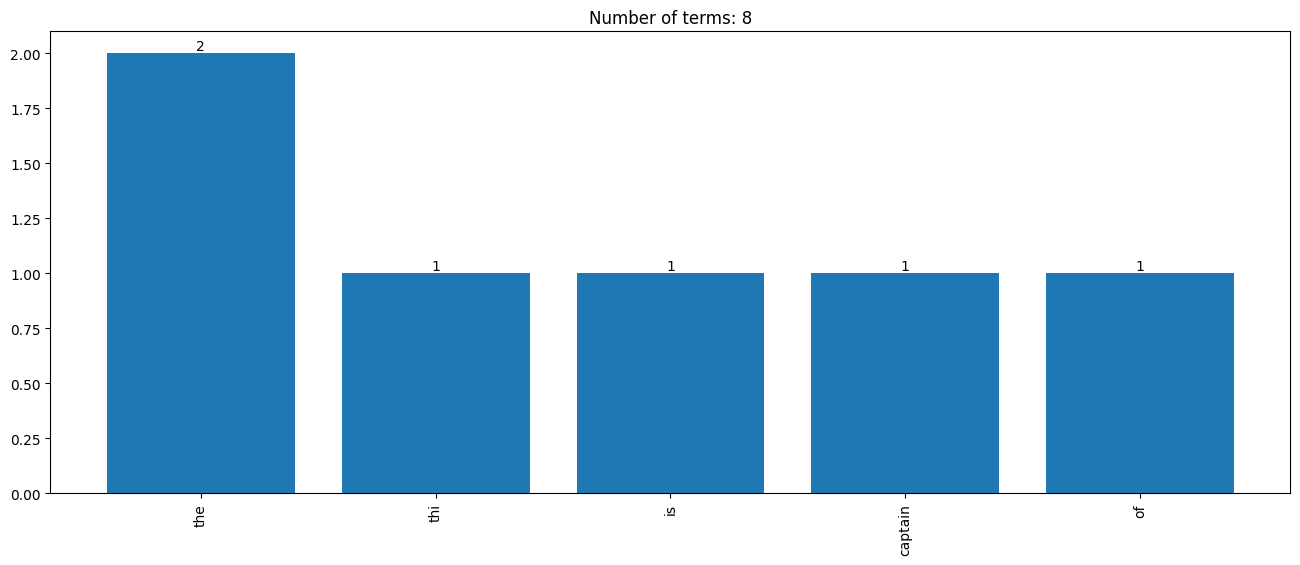

In [78]:
plot_words(stemmed.split())

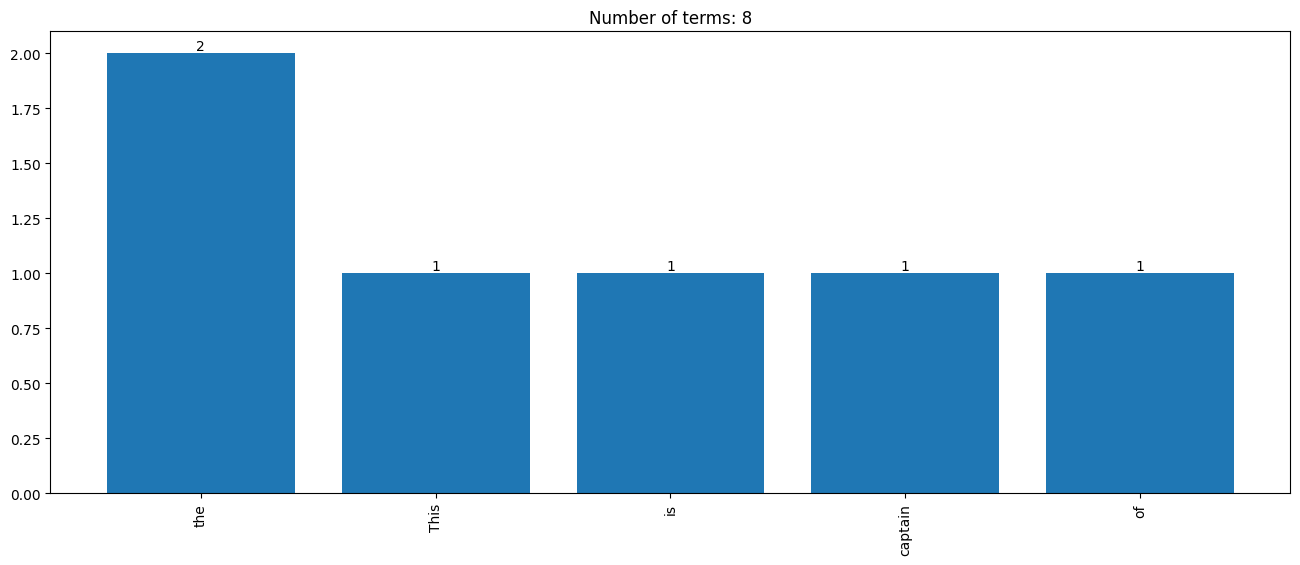

In [79]:
plot_words(lemma.split())

### Entity recognition

In [81]:
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


True

In [83]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [84]:
## nltk
entities = nltk.chunk.ne_chunk(tagged)

for e in entities:
    s = re.sub(r'[\(\)]', '', str(e))
    if s.find('/NNP') > 0:
        t = s.split()[0]
        n = ' '.join([re.sub(r'/NNP', '', x) for x in s.split()[1:]])
        print('%-12s: %s' % (t, n))

ORGANIZATION: USS




---



---



> > > > > > > > > © 2025 Institute of Data


---



---



